In [1]:
# Packages
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

import matplotlib as mpl
label_size = 8
mpl.rcParams['xtick.labelsize'] = label_size 
plt.rcParams['xtick.labelsize']=10
plt.rcParams['ytick.labelsize']=10

import wrangle

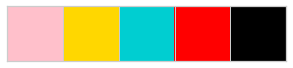

In [2]:
# Create an array with the colors you want to use
heat = [ 'pink', 'gold', 'darkturquoise', 'red', 'black']
# Set your custom color palette
my_pal = sns.color_palette(heat)
sns.palplot(my_pal)

In [3]:
# acquire data
df = pd.read_csv("train_maybe_final.csv")

In [3]:
df.type.value_counts()

Game          2652615
Activity      2059975
Assessment     534494
Clip            63522
Name: type, dtype: int64

In [4]:
df.shape

(5310606, 19)

In [8]:
df.installation_id.nunique()

3485

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5310606 entries, 0 to 5310605
Data columns (total 19 columns):
Unnamed: 0         int64
event_id           object
game_session       object
timestamp          object
event_data         object
installation_id    object
event_count        int64
event_code         int64
game_time          int64
title              object
type               object
world              object
num_correct        float64
num_incorrect      float64
accuracy           float64
accuracy_group     float64
date               object
hour               int64
weekday            object
dtypes: float64(4), int64(5), object(10)
memory usage: 769.8+ MB


In [7]:
df.head(5)

,Unnamed: 0,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday
0,0,27253bdc,34ba1a28d02ba8ba,2019-08-06 04:57:18.904000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
1,1,27253bdc,4b57c9a59474a1b9,2019-08-06 04:57:45.301000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
2,2,77261ab5,2b9d5af79bcdb79f,2019-08-06 04:58:14.538000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
3,3,b2dba42b,2b9d5af79bcdb79f,2019-08-06 04:58:14.615000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0006a69f,2,3010,29,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
4,4,1325467d,2b9d5af79bcdb79f,2019-08-06 04:58:16.680000+00:00,"{""coordinates"":{""x"":273,""y"":650,""stage_width"":...",0006a69f,3,4070,2137,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday


In [157]:
df.groupby(['installation_id','world','type','game_session']).event_code.count()

installation_id  world        type      game_session    
0006a69f         MAGMAPEAK    Activity  2b9d5af79bcdb79f    102
                                        7a4ee0624abb5ef8    110
                                        a63e30931510b96b     59
                                        aba85d9249eb9189     51
                              Clip      343d01f40e4616dc      1
                                                           ... 
ffeb0b1b         TREETOPCITY  Clip      ccc7fd9606733f83      1
                                        cd4fd86f2c34b139      1
                                        ead68f52fcce38ff      1
                                        ee35ad382b29b3e0      1
                                        fafc3deda44d80dc      1
Name: event_code, Length: 120041, dtype: int64

In [154]:
df.groupby(['installation_id','game_session']).world.count()

installation_id  game_session    
0006a69f         0336db4dee65ad4b    131
                 05921a6eb858eeba     84
                 09fd0cc02e6ee5f4      1
                 1623f262016185e4     64
                 1dd51df3dd28e7e0      1
                                    ... 
ffeb0b1b         e96910064986ea78     76
                 ead68f52fcce38ff      1
                 ee35ad382b29b3e0      1
                 f88dc29664b912a3    604
                 fafc3deda44d80dc      1
Name: world, Length: 120041, dtype: int64

# tmp 

In [207]:
df = df[df.type != 'None']

In [208]:
df.type.unique()

array(['Clip', 'Activity', 'Game', 'Assessment'], dtype=object)

In [231]:
clip2 = df.groupby(['installation_id','world','type','title'])[['game_session']].count()
clip2

game_session
installation_id world       type       title                                      
0006a69f        MAGMAPEAK   Activity   Bottle Filler (Activity)                110
                                       Sandcastle Builder (Activity)           161
                                       Watering Hole (Activity)                 51
                            Clip       Magma Peak - Level 1                      2
                                       Magma Peak - Level 2                      1
...                                                                            ...
ffeb0b1b        MAGMAPEAK   Clip       Magma Peak - Level 1                      3
                NONE        Clip       Welcome to Lost Lagoon!                   3
                TREETOPCITY Assessment Mushroom Sorter (Assessment)             97
                            Clip       Ordering Spheres                         13
                                       Tree Top City - Level 1                   2

[64216 rows x 1 columns]

In [232]:
clip2 = clip2.drop(columns = 'game_session').reset_index()
clip2

,installation_id,world,type,title
0,0006a69f,MAGMAPEAK,Activity,Bottle Filler (Activity)
1,0006a69f,MAGMAPEAK,Activity,Sandcastle Builder (Activity)
2,0006a69f,MAGMAPEAK,Activity,Watering Hole (Activity)
3,0006a69f,MAGMAPEAK,Clip,Magma Peak - Level 1
4,0006a69f,MAGMAPEAK,Clip,Magma Peak - Level 2
...,...,...,...,...
64211,ffeb0b1b,MAGMAPEAK,Clip,Magma Peak - Level 1
64212,ffeb0b1b,NONE,Clip,Welcome to Lost Lagoon!
64213,ffeb0b1b,TREETOPCITY,Assessment,Mushroom Sorter (Assessment)
64214,ffeb0b1b,TREETOPCITY,Clip,Ordering Spheres


In [234]:
clip2 = clip2.groupby(['installation_id','type'])[['title']].count()
clip2

title
installation_id type             
0006a69f        Activity        6
                Assessment      2
                Clip           13
                Game            6
0006c192        Activity        6
...                           ...
ffd2871d        Game            3
ffeb0b1b        Activity        1
                Assessment      2
                Clip            5
                Game            1

[12051 rows x 1 columns]

In [235]:
clip_pivot2 = (clip2
       .pivot_table(
           values = 'title', 
           index = ['installation_id'], 
           columns = ['type'], 
           aggfunc=np.sum
       ).fillna(0).reset_index())


In [236]:
clip_pivot2

type,installation_id,Activity,Assessment,Clip,Game
0,0006a69f,6.0,2.0,13.0,6.0
1,0006c192,6.0,2.0,16.0,6.0
2,001d0ed0,1.0,3.0,15.0,3.0
3,00225f67,3.0,0.0,10.0,3.0
4,00279ac5,6.0,0.0,11.0,10.0
...,...,...,...,...,...
3480,ff9305d7,5.0,2.0,9.0,5.0
3481,ff9715db,6.0,4.0,8.0,6.0
3482,ffc90c32,7.0,4.0,20.0,11.0
3483,ffd2871d,2.0,0.0,3.0,3.0


In [213]:
clip2[clip2.installation_id == 'ffeb0b1b']

,installation_id,world,type,title
64207,ffeb0b1b,CRYSTALCAVES,Clip,Crystal Caves - Level 1
64208,ffeb0b1b,CRYSTALCAVES,Game,Chow Time
64209,ffeb0b1b,MAGMAPEAK,Activity,Sandcastle Builder (Activity)
64210,ffeb0b1b,MAGMAPEAK,Assessment,Cauldron Filler (Assessment)
64211,ffeb0b1b,MAGMAPEAK,Clip,Magma Peak - Level 1
64212,ffeb0b1b,NONE,Clip,Welcome to Lost Lagoon!
64213,ffeb0b1b,TREETOPCITY,Assessment,Mushroom Sorter (Assessment)
64214,ffeb0b1b,TREETOPCITY,Clip,Ordering Spheres
64215,ffeb0b1b,TREETOPCITY,Clip,Tree Top City - Level 1


In [241]:
clip_pivot2 = (clip_pivot2
             .merge(median, how = "left", left_on = "installation_id", right_on = "installation_id")
             .set_index(["installation_id"]))

In [242]:
clip_pivot2

,Activity,Assessment,Clip,Game,accuracy
installation_id,,,,,
0006a69f,6.0,2.0,13.0,6.0,0.500000
0006c192,6.0,2.0,16.0,6.0,0.000000
001d0ed0,1.0,3.0,15.0,3.0,0.500000
00225f67,3.0,0.0,10.0,3.0,NaN
00279ac5,6.0,0.0,11.0,10.0,NaN
...,...,...,...,...,...
ff9305d7,5.0,2.0,9.0,5.0,0.076923
ff9715db,6.0,4.0,8.0,6.0,1.000000
ffc90c32,7.0,4.0,20.0,11.0,1.000000


In [243]:
clip_pivot2.Clip.mean()

8.89842180774749

In [244]:
clip_pivot2.Clip.median()

8.0

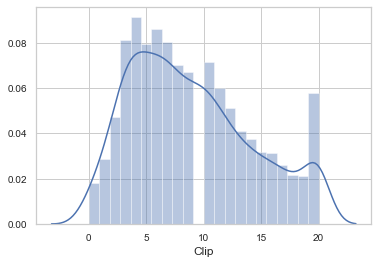

In [245]:
sns.distplot(clip_pivot2.Clip)

In [249]:
# if a kid ever watches clip > 1
# if a kid never watches clip > 0
clip_pivot2["clip_or_no"] = np.where(clip_pivot2.Clip <= 8 , "Low Clip Watching", "High Clip Watching")
# merge this df with median.accuracy on installation
# compare

Text(0.5, 1.0, 'Is there a different accuracy distribution between kids who watch clips or not watch clips?')

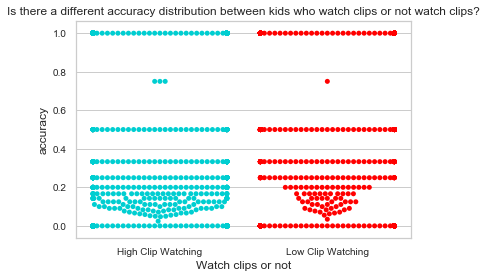

In [250]:
sns.swarmplot(x="clip_or_no", y="accuracy", data=clip_pivot2, palette = my_pal[2:4])

plt.xlabel('Watch clips or not')
#plt.xticks((''))
plt.title("Is there a different accuracy distribution between kids who watch clips or not watch clips?")

In [257]:
clip_pivot2["clip_or_no_num"] = np.where(clip_pivot2.Clip <= 8 , 0, 1)

In [260]:
clip_pivot2 = clip_pivot2.dropna()

In [261]:
r, p = stats.pearsonr(clip_pivot2.clip_or_no_num, clip_pivot2.accuracy)

In [262]:
r

-0.14507168302509957

In [263]:
p

3.271917388866358e-13

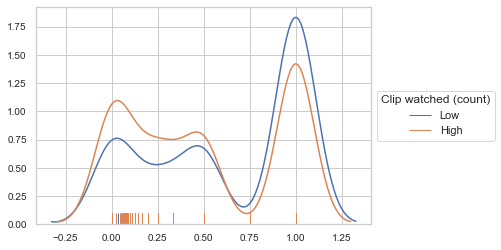

In [265]:
# Sort the dataframe by target
target_0 = clip_pivot2.loc[clip_pivot2['clip_or_no'] == 'Low Clip Watching']
target_1 = clip_pivot2.loc[clip_pivot2['clip_or_no'] == 'High Clip Watching']

sns.distplot(target_0[['accuracy']], hist=False, rug=True)
sns.distplot(target_1[['accuracy']], hist=False, rug=True)

plt.legend(title='Clip watched (count)', labels = ["Low", "High"],loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title("What're the score distributions for different kid learning bahavior: linear versus non-linear?")

#plt.show()

In [ ]:
clip = df.groupby(['installation_id','world','type','title'])[['game_session']].count().reset_index()

In [178]:
clip_pivot = (clip
       .pivot_table(
           #values = 'title', 
           index = ['installation_id'], 
           columns = ['type'], 
           #aggfunc=np.sum
       ).fillna(0).reset_index())


In [179]:
clip_pivot

installation_id game_session                                 
type                     Activity Assessment      Clip        Game
0           0006a69f   203.000000     106.00  2.153846  185.166667
1           0006c192   201.000000      70.00  1.875000  107.166667
2           001d0ed0    12.000000      55.00  1.266667   58.666667
3           00225f67    70.333333       0.00  1.000000  118.333333
4           00279ac5   188.166667       0.00  1.909091  135.000000
...              ...          ...        ...       ...         ...
3480        ff9305d7   134.000000     165.00  1.222222  182.000000
3481        ff9715db   151.500000      82.25  2.000000  108.833333
3482        ffc90c32    68.428571      51.00  1.300000  114.000000
3483        ffd2871d   280.500000       0.00  1.000000  108.000000
3484        ffeb0b1b   381.000000      93.00  4.800000  941.000000

[3485 rows x 5 columns]

In [160]:
df.groupby(['installation_id','game_session','world','type','title']).event_id.count()

installation_id  game_session      world         type      title                        
0006a69f         0336db4dee65ad4b  MAGMAPEAK     Game      Scrub-A-Dub                      131
                 05921a6eb858eeba  TREETOPCITY   Activity  Fireworks (Activity)              84
                 09fd0cc02e6ee5f4  TREETOPCITY   Clip      Pirate's Tale                      1
                 1623f262016185e4  MAGMAPEAK     Game      Scrub-A-Dub                       64
                 1dd51df3dd28e7e0  TREETOPCITY   Clip      Costume Box                        1
                                                                                           ... 
ffeb0b1b         e96910064986ea78  MAGMAPEAK     Activity  Sandcastle Builder (Activity)     76
                 ead68f52fcce38ff  TREETOPCITY   Clip      Tree Top City - Level 1            1
                 ee35ad382b29b3e0  TREETOPCITY   Clip      Ordering Spheres                   1
                 f88dc29664b912a3  CRYSTALCAVES

In [5]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [6]:
df = df[df.world != "NONE"]

In [7]:
df.shape

(5305297, 18)

In [86]:
agg = df.groupby(['installation_id','world'])[['game_session']].count()

In [87]:
agg

game_session
installation_id world                     
0006a69f        MAGMAPEAK              725
                TREETOPCITY           1878
0006c192        CRYSTALCAVES           204
                MAGMAPEAK             1336
                TREETOPCITY            664
...                                    ...
ffc90c32        TREETOPCITY            684
ffd2871d        MAGMAPEAK              927
ffeb0b1b        CRYSTALCAVES           944
                MAGMAPEAK              534
                TREETOPCITY            112

[8185 rows x 1 columns]

In [88]:
agg = agg.reset_index()

In [89]:
agg

,installation_id,world,game_session
0,0006a69f,MAGMAPEAK,725
1,0006a69f,TREETOPCITY,1878
2,0006c192,CRYSTALCAVES,204
3,0006c192,MAGMAPEAK,1336
4,0006c192,TREETOPCITY,664
...,...,...,...
8180,ffc90c32,TREETOPCITY,684
8181,ffd2871d,MAGMAPEAK,927
8182,ffeb0b1b,CRYSTALCAVES,944
8183,ffeb0b1b,MAGMAPEAK,534


In [90]:
agg = agg.pivot(index = 'installation_id', columns = 'world').fillna(0).reset_index()

In [91]:
agg

installation_id game_session                      
world                 CRYSTALCAVES MAGMAPEAK TREETOPCITY
0            0006a69f          0.0     725.0      1878.0
1            0006c192        204.0    1336.0       664.0
2            00129856          0.0       0.0        43.0
3            001d0ed0        246.0       0.0       159.0
4            00225f67          0.0       0.0       636.0
...               ...          ...       ...         ...
3518         ff9305d7        344.0     680.0      1030.0
3519         ff9715db        464.0     928.0       544.0
3520         ffc90c32        489.0     827.0       684.0
3521         ffd2871d          0.0     927.0         0.0
3522         ffeb0b1b        944.0     534.0       112.0

[3523 rows x 4 columns]

In [92]:
agg.columns = ['installation_id', 'Crystalcaves', 'Magamapeak', 'Treetopcity']

In [93]:
agg.set_index('installation_id', inplace = True)

In [15]:
agg.to_csv('practice_counts.csv')

Text(0.5, 1.0, 'What are the usage distributions (ratio) for each world?')

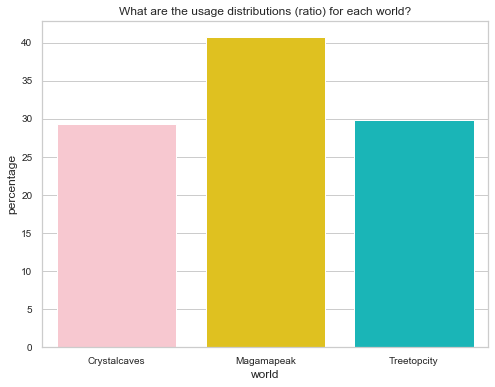

In [16]:
plt.figure(figsize=(8,6))

c = agg.sum(axis = 0)
pcts = c.groupby(level=0).apply(lambda x: 100 * x / float(c.sum())).to_frame().reset_index()
pcts.columns = ['world', 'percentage']
(sns.barplot(x = "world" , y="percentage", data=pcts, palette=my_pal))
#plt.legend(title='World', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("What are the usage distributions (ratio) for each world?")

# Magamapeak > most frequently visited world 

In [17]:
agg.sort_values(by = ['Magamapeak','Treetopcity','Crystalcaves'], ascending = False, inplace = True)

In [18]:
agg = agg.reset_index()

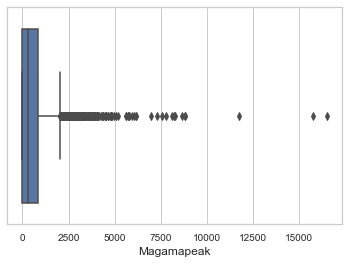

In [19]:
sns.boxplot(agg.Magamapeak)

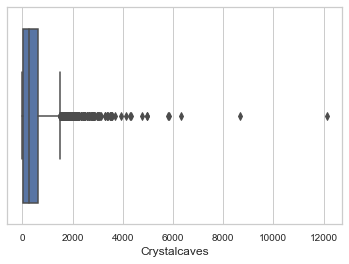

In [20]:
sns.boxplot(agg.Crystalcaves)

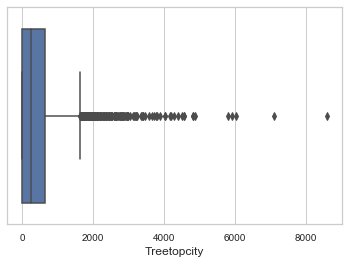

In [21]:
sns.boxplot(agg.Treetopcity)

In [22]:
agg.Crystalcaves.median()

258.0

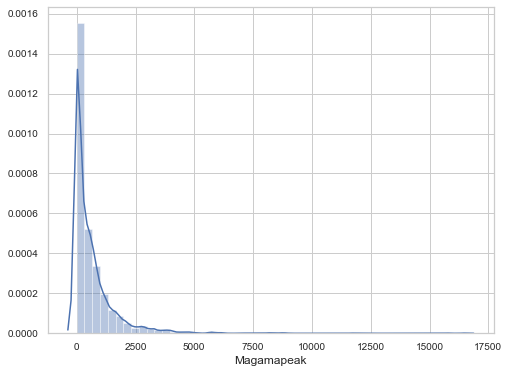

In [23]:
plt.figure(figsize=(8,6))
sns.distplot(agg.Magamapeak)

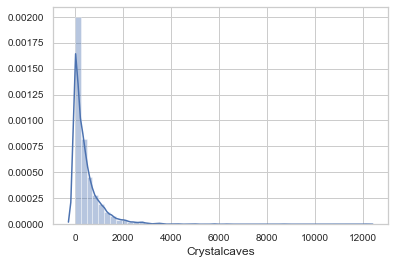

In [24]:
sns.distplot(agg.Crystalcaves)

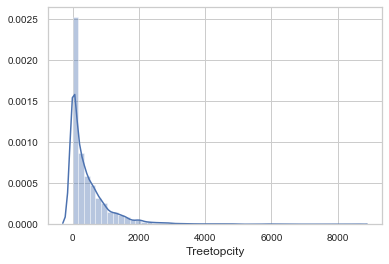

In [25]:
sns.distplot(agg.Treetopcity)

In [26]:
(df.groupby(["world","type"])["game_session"].count())

world         type      
CRYSTALCAVES  Activity       358980
              Assessment     288231
              Clip            21834
              Game           944823
MAGMAPEAK     Activity       994084
              Assessment     143216
              Clip            11703
              Game          1097999
TREETOPCITY   Activity       705527
              Assessment     308534
              Clip            24635
              Game           608150
Name: game_session, dtype: int64

Text(0.5, 1.0, 'What are the most visited engagement types in the game?')

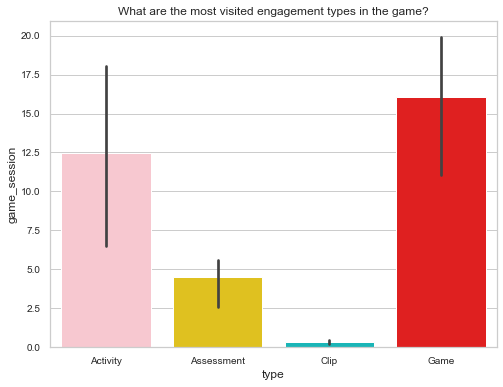

In [27]:
plt.figure(figsize=(8,6))

c = (df.groupby(["world","type"])["game_session"].count())
pcts = c.groupby(level=0).apply(lambda x: 100 * x / float(c.sum())).to_frame().reset_index()
#plt.legend(title='Color', loc='center left', bbox_to_anchor=(1, 0.5))
(sns.barplot(x = "type" , y="game_session", data=pcts, palette=my_pal))

plt.title("What are the most visited engagement types in the game?")

# overall, games and activities are much more used than assessments

In [28]:
# top 5 most played missions
pcts[pcts.game_session >= 4.5].sort_values('game_session', ascending = False)

,world,type,game_session
7,MAGMAPEAK,Game,19.935650
4,MAGMAPEAK,Activity,18.048934
3,CRYSTALCAVES,Game,17.154534
8,TREETOPCITY,Activity,12.809793
11,TREETOPCITY,Game,11.041782
0,CRYSTALCAVES,Activity,6.517765
9,TREETOPCITY,Assessment,5.601850
1,CRYSTALCAVES,Assessment,5.233222


Text(0.5, 1.0, 'The most used missions in each world & engagement type (only showing record of >3.5% usage)?')

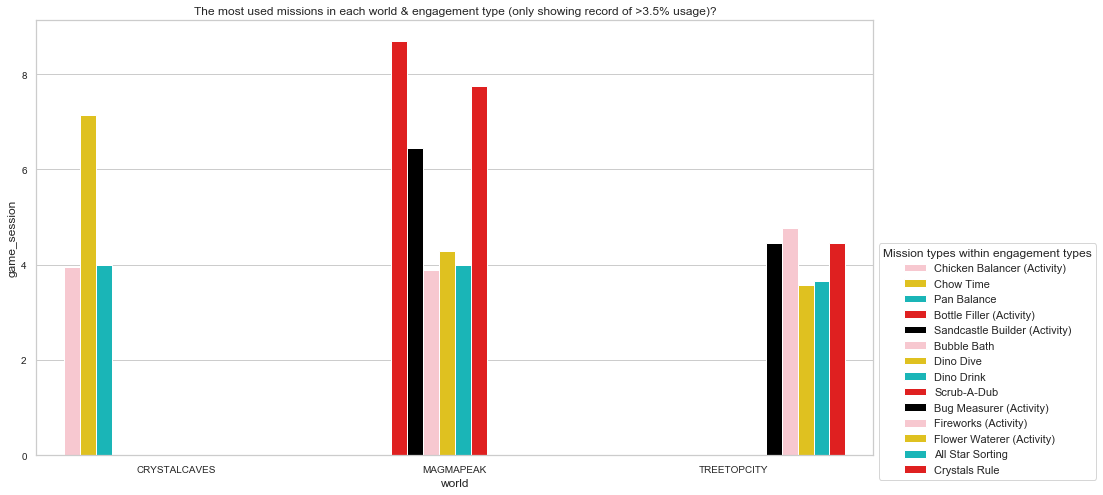

In [29]:
plt.figure(figsize=(15,8))

c = (df.groupby(["world", "type", "title"])["game_session"].count())
pcts = c.groupby(level=0).apply(lambda x: 100 * x / float(c.sum())).to_frame().reset_index()
pcts = pcts[pcts.game_session >= 3.5]
#plt.legend(title='Color', loc='center left', bbox_to_anchor=(1, 0.5))
(sns.barplot(x = "world" , y="game_session", data=pcts,  hue = "title",palette=my_pal))
plt.legend(title='Mission types within engagement types', loc='upper left', bbox_to_anchor=(1, 0.5))
plt.title("The most used missions in each world & engagement type (only showing record of >3.5% usage)?")


In [30]:
# look at a ratio of total game time:total clicks

In [36]:
# import Faith's game time dadaset, note that game_time does not include time for clips
game_time = pd.read_csv('game_mins.csv')

In [40]:
game_time.drop(columns = 'Unnamed: 0', inplace = True)

In [41]:
game_time.head()

,installation_id,activity_mins,assessment_mins,game_mins
0,0006a69f,40.428983,3.940483,21.988250
1,0006c192,20.175500,5.384350,8.822533
2,00129856,0.000000,0.662367,0.000000
3,001d0ed0,0.477983,3.319300,4.459850
4,00225f67,3.612000,0.593950,5.462883


In [42]:
df.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday
1,27253bdc,4b57c9a59474a1b9,2019-08-06 04:57:45.301000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
2,77261ab5,2b9d5af79bcdb79f,2019-08-06 04:58:14.538000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
3,b2dba42b,2b9d5af79bcdb79f,2019-08-06 04:58:14.615000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0006a69f,2,3010,29,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
4,1325467d,2b9d5af79bcdb79f,2019-08-06 04:58:16.680000+00:00,"{""coordinates"":{""x"":273,""y"":650,""stage_width"":...",0006a69f,3,4070,2137,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
5,1325467d,2b9d5af79bcdb79f,2019-08-06 04:58:18.474000+00:00,"{""coordinates"":{""x"":863,""y"":237,""stage_width"":...",0006a69f,4,4070,3937,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday


In [77]:
# in each user account, how many games did they play, and how many actions did they actually do?
action = df.groupby(['installation_id','game_session', 'type']).event_id.count().reset_index()

In [81]:
act = action.drop(columns = 'game_session')

In [95]:
act

,installation_id,type,event_id
0,0006a69f,Game,131
1,0006a69f,Activity,84
2,0006a69f,Clip,1
3,0006a69f,Game,64
4,0006a69f,Clip,1
...,...,...,...
119709,ffeb0b1b,Activity,76
119710,ffeb0b1b,Clip,1
119711,ffeb0b1b,Clip,1
119712,ffeb0b1b,Game,604


In [94]:
agg = agg.pivot(index = 'installation_id', columns = 'world').fillna(0).reset_index()
act.pivot(index = 'installation_id', columns = '')

KeyError: 'None of [None] are in the columns'

In [84]:
med = act.event_id.median()

In [85]:
Q1 = 

3.0

In [83]:
action = action.pivot(index = 'installation_id', columns = 'type').fillna(0).reset_index()

In [ ]:
action = agg.reset_index()
agg = agg.pivot(index = 'installation_id', columns = 'world').fillna(0).reset_index()
agg.columns = ['installation_id', 'Crystalcaves', 'Magamapeak', 'Treetopcity']
agg.set_index('installation_id', inplace = True)

In [ ]:
df.groupby(['installation_id','world']).game_session.count()

In [ ]:
df.groupby(['installation_id','world','type']).game_session.count()

In [ ]:
df.groupby(['installation_id','world','type','game_session']).event_id.count()

In [ ]:
df.groupby(['installation_id','world','type','game_session']).event_count.value_counts()

In [ ]:
df.groupby(['installation_id','world','type','game_session']).event_id.value_counts()

In [ ]:
df['game_time_min'] = (df.game_time/60000)

In [ ]:
df_no_clip = df[df.type!= 'Clip']

In [ ]:
df.groupby(['world','type']).title.count().to_frame()

In [ ]:
pd.pivot_table(df_no_clip, values = ["game_time_min"], index=["world", "type", "title"], aggfunc=[np.sum, np.mean, np.median])

In [ ]:
# if game_time << game_time median for particular mission, do something so we don't include click arounds

In [ ]:
user_result = pd.crosstab(df.installation_id, df.accuracy_group)

In [ ]:
user_nail_rate = pd.DataFrame(df.groupby("installation_id")["accuracy"].median())

In [ ]:
user_type = pd.crosstab(df.installation_id, df.type)

In [ ]:
exp_eepd = pd.concat([user_type, user_result, user_nail_rate], axis = 1)

In [ ]:
# filter random:
# among all data and the various "learning" items of
# "Activity", "Clip", "Game"
# if  participate in none > 
# if participate in at least 1/ 2 > then?
# how does that compare to participate all three?

# next need to consider time component,
# finding the order of EEPD
exp_eepd

In [ ]:
exp_eepd["nActivity"] = exp_eepd.Activity.apply(lambda x: 1 if x > 0 else 0)
exp_eepd["nClip"] = exp_eepd.Clip.apply(lambda x: 1 if x > 0 else 0)
exp_eepd["nGame"] = exp_eepd.Game.apply(lambda x: 1 if x > 0 else 0)

In [ ]:
exp_eepd["sum_engage"] = exp_eepd.nActivity + exp_eepd.nClip + exp_eepd.nGame

In [ ]:
plot = exp_eepd.sum_engage.value_counts(normalize = True).to_frame().reset_index()
(sns.barplot(x = "index" , y="sum_engage", data=plot, palette=my_pal))
plt.title("Throughout the play-time, how many engagement types did each kid use?")
plt.xlabel("Number of engagement types")

In [ ]:
syllabus = pd.read_csv("media_sequence.csv")

In [ ]:
syllabus.shape

In [ ]:
syllabus["order"] = range(1, 45)

In [ ]:
syllabus.head()

In [ ]:
# merge main dataframe with "syllabus"
exp_eepd2 =  (df
              .merge(syllabus, how = 'left', left_on = "title", right_on = "title")
              .set_index(["installation_id", "timestamp"]))

In [ ]:
median = exp_eepd2.groupby(["installation_id"]).accuracy.median().reset_index()

In [ ]:
exp_eepd2 = (exp_eepd2
             .reset_index()
             .merge(median, how = "left", left_on = "installation_id", right_on = "installation_id")
             .set_index(["installation_id", "timestamp"]))

In [ ]:
exp_eepd2.head()

In [ ]:
exp_eepd2["accuracy"] = np.where(exp_eepd2.accuracy_x.isna(), exp_eepd2.accuracy_y, exp_eepd2.accuracy_x)
#df['c2'] = np.where(df.c1 == 8,'X',df.c3)

In [ ]:
from linear_random import *

In [ ]:
path = exp_eepd2.groupby('installation_id').order.apply(is_list_sorted).reset_index()

In [ ]:
path

In [ ]:
print(f"The percentage of kids who follow linear learning path: {round(path.mean(),2)*100}%")

In [ ]:
path = path.merge(exp_eepd2.accuracy, how = "left", left_on = "installation_id", right_on = "installation_id")

In [ ]:
path = path.groupby(["installation_id","order"]).median().reset_index()

In [ ]:
path.groupby("order").accuracy.median()

In [ ]:
path["order_"] = np.where(path.order == True, "Linear", "Non-linear")

In [ ]:
# Sort the dataframe by target
target_0 = path.loc[path['order_'] == "Linear"]
target_1 = path.loc[path['order_'] == "Non-linear"]

sns.distplot(target_0[['accuracy']], hist=False, rug=True, color = 'red')
sns.distplot(target_1[['accuracy']], hist=False, rug=True, color = 'darkturquoise')

plt.legend(title='Learning Paths', labels = ["Linear", "Non-linear"],loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("What're the score distributions for different kid learning bahavior: linear versus non-linear?")

plt.show()

In [ ]:
path.groupby("order").accuracy.value_counts()

In [ ]:
sns.swarmplot(x="order_", y="accuracy", data=path, palette = my_pal[2:4])
plt.xlabel('Learning behaviors')
plt.title("Is there a different accuracy distribution between kids that demonstrate different learning behavior?")

In [ ]:
df.type

In [ ]:
df[df.type == 'Assessment'].groupby(["world","title"]).accuracy.median()

In [ ]:
df[df.type == 'Assessment'].groupby(["world","title"]).accuracy.mean()

In [ ]:
df[df.type == 'Assessment'].groupby(["world","title"]).installation_id.count()

In [237]:
# fill in the median
median = df.groupby(["installation_id"]).accuracy.median().reset_index()

In [238]:
median

,installation_id,accuracy
0,0006a69f,0.500000
1,0006c192,0.000000
2,001d0ed0,0.500000
3,00225f67,NaN
4,00279ac5,NaN
...,...,...
3480,ff9305d7,0.076923
3481,ff9715db,1.000000
3482,ffc90c32,1.000000
3483,ffd2871d,NaN


In [6]:
test = (df
             .reset_index()
             .merge(median, how = "left", left_on = "installation_id", right_on = "installation_id")
             .set_index(["installation_id"]))

In [11]:
test.accuracy_x.isna().mean()

0.8993534824462595

In [10]:
test.accuracy_y.isna().mean()

0.08533527058870494

In [7]:
# recreate accuracy by filling in median if there's no accuracy score, else keep original
test["accuracy_c"] = np.where(test.accuracy_x.isna(), test.accuracy_y, test.accuracy_x)

In [16]:
test.accuracy_c.value_counts()

1.000000    1535346
0.000000    1123341
0.500000     874333
0.333333     461508
0.250000     313655
0.200000     147522
0.166667      88458
0.125000      60199
0.142857      57099
0.090909      38303
0.100000      29723
0.111111      28088
0.076923      16888
0.083333      15428
0.047619      12119
0.071429      10757
0.066667      10341
0.750000       9662
0.058824       7827
0.034483       3692
0.055556       3651
0.062500       3568
0.024390       2229
0.052632       1760
0.050000       1019
0.040000        328
0.045455        247
0.037037        180
0.041667        153
Name: accuracy_c, dtype: int64

In [17]:
# what's wrong with my join?
test.type.unique()

array(['Clip', 'Activity', 'Game', 'Assessment'], dtype=object)

In [15]:
# drop kids who never took assessments
#.dropna(inplace = True)

In [16]:
#df.shape #(5305297, 18)

(534494, 20)

In [8]:
test.drop(columns = ['accuracy_x', 'accuracy_group', 'date', 'hour', 'weekday', 'accuracy_y'], inplace = True)

In [9]:
test.type.value_counts()

Game          2652615
Activity      2059975
Assessment     534494
Clip            63522
Name: type, dtype: int64

In [22]:
test.groupby(['installation_id']).type.value_counts()

installation_id  type      
0006a69f         Activity      1218
                 Game          1111
                 Assessment     212
                 Clip            28
0006c192         Activity      1206
                               ... 
ffd2871d         Clip             3
ffeb0b1b         Game           941
                 Activity       381
                 Assessment     186
                 Clip            24
Name: type, Length: 12051, dtype: int64

In [29]:
agg = test.groupby(['installation_id','game_session','type'])[['title']].count()

In [30]:
agg

title
installation_id game_session     type           
0006a69f        0336db4dee65ad4b Game        131
                05921a6eb858eeba Activity     84
                09fd0cc02e6ee5f4 Clip          1
                1623f262016185e4 Game         64
                1dd51df3dd28e7e0 Clip          1
...                                          ...
ffeb0b1b        e96910064986ea78 Activity     76
                ead68f52fcce38ff Clip          1
                ee35ad382b29b3e0 Clip          1
                f88dc29664b912a3 Game        604
                fafc3deda44d80dc Clip          1

[120041 rows x 1 columns]

In [11]:
agg = agg.reset_index()

In [29]:
agg

,installation_id,game_session,type,title
0,0006a69f,0336db4dee65ad4b,Game,131
1,0006a69f,05921a6eb858eeba,Activity,84
2,0006a69f,09fd0cc02e6ee5f4,Clip,1
3,0006a69f,1623f262016185e4,Game,64
4,0006a69f,1dd51df3dd28e7e0,Clip,1
...,...,...,...,...
120036,ffeb0b1b,e96910064986ea78,Activity,76
120037,ffeb0b1b,ead68f52fcce38ff,Clip,1
120038,ffeb0b1b,ee35ad382b29b3e0,Clip,1
120039,ffeb0b1b,f88dc29664b912a3,Game,604


In [12]:
agggg = (agg
       .pivot_table(
           values = 'title', 
           index = ['installation_id'], 
           columns = ['type'], 
           aggfunc=np.sum).fillna(0).reset_index())


In [41]:
len(agggg[agggg.Clip == 0])

57

In [31]:
agggg.Clip.mean()

18.22725968436155

In [32]:
agggg.Clip.median()

11.0

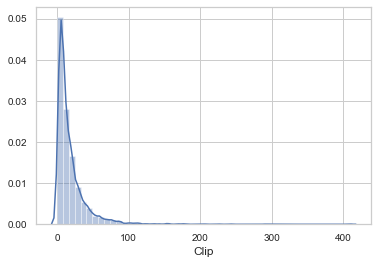

In [34]:
sns.distplot(agggg.Clip)

In [33]:
#agg.columns = ['installation_id', 'Activity', 'Assessment', 'Clip','Game']

In [ ]:
#agg = agg.set_index('installation_id')

# tmp2

In [42]:
median

,installation_id,accuracy
0,0006a69f,0.500000
1,0006c192,0.000000
2,001d0ed0,0.500000
3,00225f67,NaN
4,00279ac5,NaN
...,...,...
3480,ff9305d7,0.076923
3481,ff9715db,1.000000
3482,ffc90c32,1.000000
3483,ffd2871d,NaN


In [43]:
testttt = (agggg
             .merge(median, how = "left", left_on = "installation_id", right_on = "installation_id")
             .set_index(["installation_id"]))

In [17]:
testttt.drop(columns = ['index', 'Unnamed: 0'], inplace = True)

In [44]:
testttt.columns

Index(['Activity', 'Assessment', 'Clip', 'Game', 'accuracy'], dtype='object')

In [45]:
testttt.Clip.mean()

18.22725968436155

In [46]:
testttt.Clip.median()

11.0

In [47]:
testttt.Clip.min()

0.0

In [54]:
testttt = testttt.dropna()

In [92]:
# if a kid ever watches clip > 1
# if a kid never watches clip > 0
testttt["clip_or_no"] = np.where(testttt.Clip < 15.5, 'Low', 'High')
# merge this df with median.accuracy on installation
# compare

In [93]:
# this is how 
testttt['clip_or_no'].value_counts()

Low     1261
High    1235
Name: clip_or_no, dtype: int64

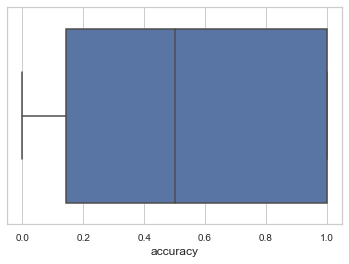

In [132]:
sns.boxplot(testttt.accuracy)

In [138]:
x = testttt.accuracy
# set conditions
# strings contain week, month, year need conversion
# strings contain day remain the same
condlist = ([
    x <= .2,
    (x > .2) & (x <= .8),
    x > .8
            ])
# when meeting the quiteria, do these math
choicelist = ("low_score",
              "mid_score",
              "high_score")
# store info back into df after conversion
testttt['look_accuracy'] = np.select(condlist, choicelist)

In [143]:
testttt.look_accuracy.value_counts()

high_score    1035
mid_score      732
low_score      729
Name: look_accuracy, dtype: int64

In [146]:
testttt.head()

,Activity,Assessment,Clip,Game,accuracy,clip_or_no,cat_clip_or_no,look_accuracy
installation_id,,,,,,,,
0006a69f,1218.0,212.0,28.0,1111.0,0.500000,High,1,mid_score
0006c192,1206.0,140.0,30.0,643.0,0.000000,High,1,low_score
001d0ed0,12.0,165.0,19.0,176.0,0.500000,High,1,mid_score
002db7e3,1534.0,404.0,39.0,1402.0,0.090909,High,1,low_score
003372b0,538.0,201.0,27.0,980.0,0.500000,High,1,mid_score


In [147]:
testttt[testttt.look_accuracy == "low_score"].Clip.mean()

27.246913580246915

In [149]:
testttt[testttt.look_accuracy == "low_score"].Activity.mean()

887.4348422496571

In [151]:
testttt[testttt.look_accuracy == "low_score"].Game.mean()

1086.432098765432

In [148]:
testttt[testttt.look_accuracy == "high_score"].Clip.mean()

17.36328502415459

In [150]:
testttt[testttt.look_accuracy == "high_score"].Activity.mean()

561.3787439613527

In [152]:
testttt[testttt.look_accuracy == "high_score"].Game.mean()

713.4946859903382

In [ ]:
# look at lower accuracy versus high accuracy, what's the clip watching rate looking like
look_accuracy = np.where(testttt.accuracy <.2, "low_score")

Text(0.5, 1.0, 'Is there a different accuracy distribution between kids who watch clips or not watch clips?')

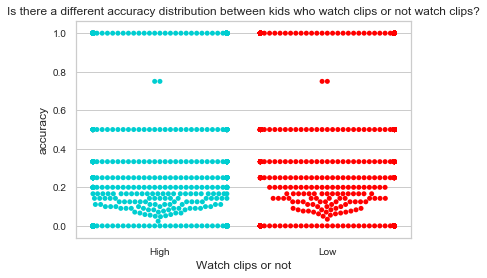

In [94]:
sns.swarmplot(x="clip_or_no", y="accuracy", data=testttt, palette = my_pal[2:4])

plt.xlabel('Watch clips or not')
#plt.xticks((''))
plt.title("Is there a different accuracy distribution between kids who watch clips or not watch clips?")

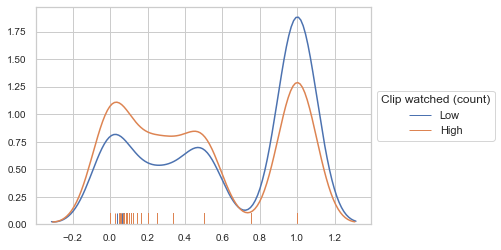

In [97]:
# Sort the dataframe by target
target_0 = testttt.loc[testttt['clip_or_no'] == 'Low']
target_1 = testttt.loc[testttt['clip_or_no'] == 'High']

sns.distplot(target_0[['accuracy']], hist=False, rug=True)
sns.distplot(target_1[['accuracy']], hist=False, rug=True)

plt.legend(title='Clip watched (count)', labels = ["Low", "High"],loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title("What're the score distributions for different kid learning bahavior: linear versus non-linear?")

#plt.show()

In [100]:
testttt["cat_clip_or_no"] = np.where(testttt.clip_or_no == "Low", 0, 1)

In [98]:
from scipy import stats as stats

In [101]:
r, p = stats.pearsonr(testttt.cat_clip_or_no, testttt.accuracy)

In [102]:
r

-0.1608005768913406

In [103]:
p

6.360005313290182e-16

$H0$: There is no difference in accuracy between the kids who watch small amount of clips versus large amount of clips.

$Ha$: There is a difference in accuracy between the kids who watch small amount of clips versus large amount of clips.

In [104]:
low = testttt[testttt.clip_or_no == "Low"].accuracy
high = testttt[testttt.clip_or_no == "High"].accuracy

In [105]:
tstat, p = stats.ttest_ind(low, high)

In [106]:
tstat

8.136252745880588

In [107]:
p

6.36000531331783e-16

In [108]:
from sklearn.preprocessing import Normalizer

In [109]:
low_trans = testttt[testttt.clip_or_no == "Low"].reset_index()
high_trans = testttt[testttt.clip_or_no == "High"].reset_index()

In [110]:
low_trans

,installation_id,Activity,Assessment,Clip,Game,accuracy,clip_or_no,cat_clip_or_no
0,00634433,0.0,90.0,7.0,99.0,1.000000,Low,0
1,010bc1d5,236.0,96.0,5.0,167.0,1.000000,Low,0
2,01825124,499.0,102.0,11.0,518.0,0.250000,Low,0
3,01cc53f3,348.0,79.0,9.0,535.0,1.000000,Low,0
4,01faa4bf,235.0,144.0,5.0,710.0,1.000000,Low,0
...,...,...,...,...,...,...,...,...
1256,fe488283,549.0,102.0,4.0,3.0,0.250000,Low,0
1257,fe4d880a,495.0,71.0,9.0,577.0,0.000000,Low,0
1258,fe73bf4b,697.0,139.0,8.0,348.0,0.333333,Low,0
1259,ff882868,332.0,76.0,4.0,0.0,0.333333,Low,0


In [113]:
transformer = Normalizer()
l_transformed = pd.DataFrame(transformer.transform(low_trans[['accuracy']]).flatten())
l_transformed = pd.DataFrame(l_transformed)
l = pd.concat([l_transformed,low_trans], axis=1)

In [116]:
l.columns = ['transformed_accuracy', 'installation_id', 'Activity','Assessment','Clip','Game','accuracy','clip_or_no','cat_clip_or_no']

In [118]:
transformer = Normalizer()
h_transformed = pd.DataFrame(transformer.transform(high_trans[['accuracy']]).flatten())
h_transformed = pd.DataFrame(h_transformed)
h = pd.concat([h_transformed,high_trans], axis=1)

In [120]:
h.columns = ['transformed_accuracy', 'installation_id', 'Activity','Assessment','Clip','Game','accuracy','clip_or_no','cat_clip_or_no']

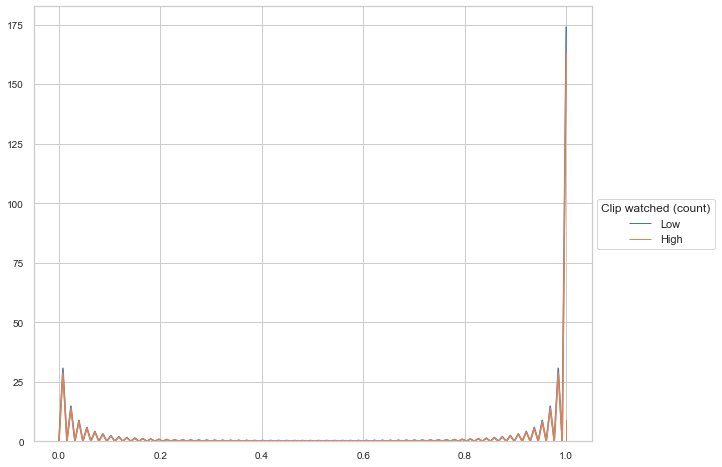

In [124]:
plt.figure(figsize=(10,8))
# Sort the dataframe by target
target_0 = l.loc[l['clip_or_no'] == 'Low']
target_1 = h.loc[h['clip_or_no'] == 'High']

sns.distplot(target_0[['transformed_accuracy']], hist=False, rug=True)
sns.distplot(target_1[['transformed_accuracy']], hist=False, rug=True)

plt.legend(title='Clip watched (count)', labels = ["Low", "High"],loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title("What're the score distributions for different kid learning bahavior: linear versus non-linear?")

#plt.show()

In [125]:
from sklearn.preprocessing import PowerTransformer,StandardScaler

In [126]:
low_trans = testttt[testttt.clip_or_no == "Low"].reset_index()
high_trans = testttt[testttt.clip_or_no == "High"].reset_index()

In [127]:
# create scaler object using yeo-johnson method and fit to train
l_scaler = PowerTransformer(method='yeo-johnson', standardize=False, copy=True).fit(low_trans[['accuracy']])
# fit linear.accuracy
l_scaled = pd.DataFrame(l_scaler.transform(low_trans[['accuracy']]))

# apply to test
#test_scaled = pd.DataFrame(scaler.transform(test), columns=test.columns.values).set_index([test.index.values])

l_scaled.head()

,0
0,1.304404
1,1.304404
2,0.270269
3,1.304404
4,1.304404


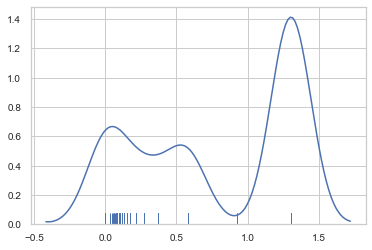

In [129]:
sns.distplot(l_scaled, hist=False, rug=True)

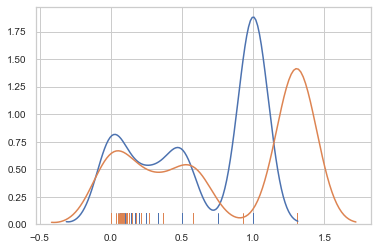

In [130]:
target_0 = testttt.loc[testttt['clip_or_no'] == 'Low']

sns.distplot(target_0[['accuracy']], hist=False, rug=True)
sns.distplot(l_scaled, hist=False, rug=True)

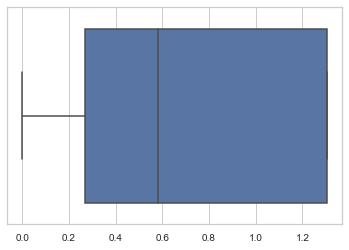

In [131]:
sns.boxplot(l_scaled)